R^2 : 0.9804899950518966
prediction : [1033.33333333]


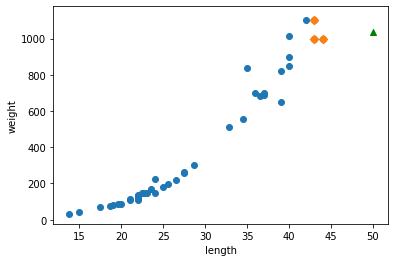

1033.3333333333333


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

#농어의 길이
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

#농어의 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
distances, indexes = knr.kneighbors([[50]])
prediction = knr.predict([[50]])
print("R^2 : {}".format(knr.score(train_input, train_target)))
print("prediction : {}".format(prediction))
plt.scatter(50, knr.predict([[50]]), color="green", marker='^')
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#직접 최근접 이웃 3개의 평균을 구해보자
print(np.mean(train_target[indexes]))

#새로운 샘플이 훈련 세트의 범위를 벗어나면 정확하지 않은 값으로 예측할 수 있다.

### **길이가 100cm인 농어 예측**

R^2 : 0.9804899950518966
prediction : [1033.33333333]


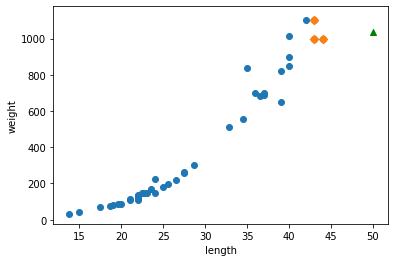

In [2]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)
distances, indexes = knr.kneighbors([[100]])
prediction = knr.predict([[100]])
print("R^2 : {}".format(knr.score(train_input, train_target)))
print("prediction : {}".format(prediction))
plt.scatter(50, knr.predict([[100]]), color="green", marker='^')
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#50cm인 농어와 똑같은 무게로 예측한다.
#농어가 아무리 커도 똑같은 무게로 예측하게 된다.

# **머신러닝 제 3장**  
### **선형 회귀(Linear Regression)**  
> 특성이 한 개인 경우 특성을 잘 나타낼 수 있는 선을 찾는 알고리즘이다.  
샘플 데이터를 통해 다양한 데이터를 추정할 수 있는 함수로 구성되어 있다.  
비교적 간단하고 성능이 뛰어나기 때문에 널리 사용되는 대표적인 회귀 알고리즘이다.

### 머신러닝
> ### ㄴ지도 학습
>> ### ㄴ 분류
>>> ### ㄴk-최근접 이웃
>> ### ㄴ 회귀
>>> ### ㄴk-최근접 이웃 회귀
>>> ### ㄴ**선형 회귀**
> ### ㄴ비지도 학습
> ### ㄴ강화 학습

In [3]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))
print(lr.predict([[100]]))

[1241.83860323]
[3192.69585141]


> 샘플데이터를 통해 적절한 계수(기울기)와 절편의 직선을  
선형회귀가 그어줌으로써 제법 정확한 예측값이 나오게 된다.

### **coefficient(계수), intercept(절편)**
>> 선형 회귀를 통해 그어진 직선의 계수와 절편을 선형회귀 객체를 통해 가져올 수 있다.  
- lr.coef_ : 계수 (weight-가중치 라고도 표현함)
- lr.intercept_ : 절편   

>> 이렇게 알고리즘이 찾은 값인 계수와 절편을 모델 파라미터라고 부른다.  
>> 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것이며 이를 모델 기반 학습이라고 부른다.  
>> k-최근접 이웃은 모델 파라미터가 없고 훈련 세트를 저장만 하는 것이기 때문에  
이러한 학습은 사례 기반 학습이라고 부른다.

In [5]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


### **f(x) = lr.coef_*x + lr.intercept_**  
### **f(15)와 f(50)의 점을 연결하여 직선 그래프를 작성한다.**

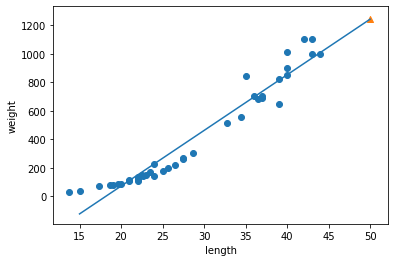

In [7]:
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, lr.predict([[50]]), marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

#훈련 세트와 테스트 세트의 결과를 통해 둘 다 평가점수가 낮다.
#과소적합

0.9398463339976039
0.8247503123313558


> *직선으로 그리게 되니까 농어의 무게가 0g 밑으로 내려가게 된다.
있을 수 없는 일이다.  
최적의 직선보다 최적의 곡선을 찾아야 된다.*

### **다항 회귀(Polynomial Regression)**  
> 2차 방정식 이상의 다항식을 사용한 선형 회귀  

* *그래프 그림판 : https://www.desmos.com/calculator?lang=ko*

> **f(x) = lr.coef_[0] * x² + lr.coef_[1] * x + lr.intercept_**  
**f(15)와 f(50)의 점을 연결하여 곡선 그래프를 작성한다.**  
***길이를 제곱한 값(x²)과 길이(x)로 훈련 세트를 만들어야 한다.***

In [9]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


### **선형회귀 모델을 훈련한 후 50cm 농어의 제곱길이, 무게길이를 전달하여 다항 회귀로 무게 예측**

In [11]:
lr = LinearRegression()
lr.fit(train_poly, train_target) #타겟은 그대로 사용한다.

print(lr.predict([[50**2, 50]]))
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278259


---
* 그래프 그림판 : https://www.desmos.com/calculator?lang=ko  
y=1.01433211x^2 - 21.55792498x + 116.05021078278259  

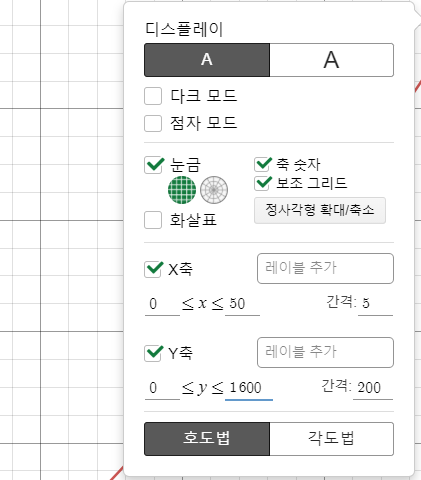

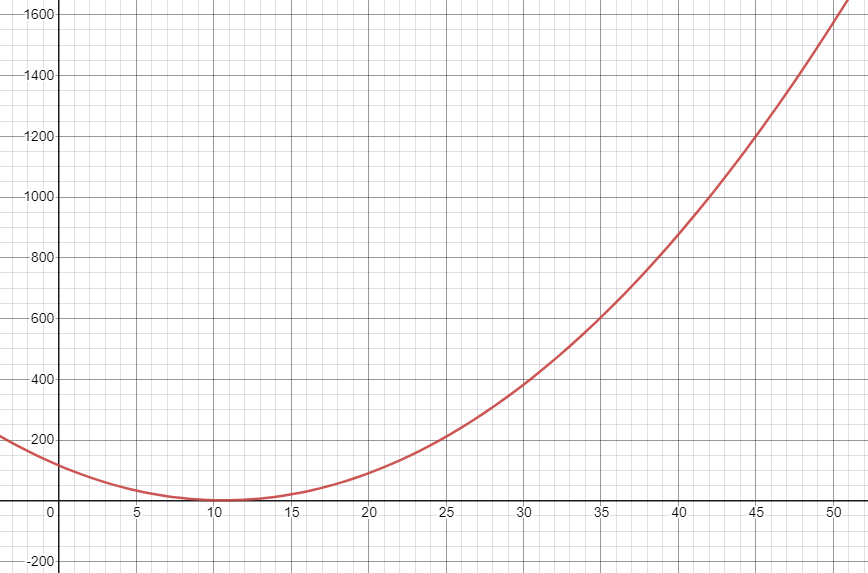

### **2차 방정식의 산점도**  
* 짧은 직선을 이어서 그리며 곡선처럼 표현한다.

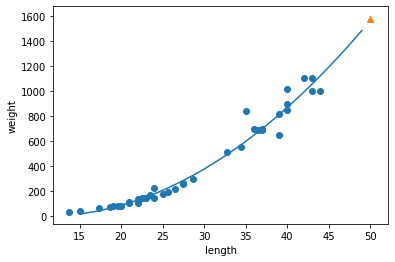

In [12]:
#구간별 직선을 그리기 위해 15~49까지의 정수 배열 선언
point = np.arange(15, 50)

#훈련 세트 산점도 표현
plt.scatter(train_input, train_target)

#15~49까지 2차 방정식 그래프 표현
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

#50cm 농어
plt.scatter(50, 1574, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [13]:
print("train set R^2 : {}".format(lr.score(train_poly, train_target)))
print("test set R^2 : {}".format(lr.score(test_poly, test_target)))

#거의 정확하지만 과소적합이다.
#테스트에서 더 높은 R²평가
#조금 더 복잡한 모델이 필요해 보인다.

train set R^2 : 0.9706807451768623
test set R^2 : 0.9775935108325122
